<a href="https://colab.research.google.com/github/raderas/Data-Science-Projects/blob/main/MNIST_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Test
This notebook loads the MNIST dataset which has images of handwritten numbers with their corresponding labels. Gemini was used to generate the data loading code and to aid in the generation of the image plotting.

It then splits the data set into a training and a test set.

The training set is used to train a neural network of three layers with 25, 15 and 10 units respectively. First and 2nd layer use a relu activation while the last layer uses a linear activation.
The model is compiled with the SparseCategorigalCrossentropy loss function which is suited for multi class classification.

The results are then fed to a sigmoid function to get the specific label for each of the test cases.

Finally we print some of the training images together with their label and the prediction of the model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [2]:
from sklearn.datasets import fetch_openml

# Load the MNIST dataset
# The data will be downloaded if not already present in your scikit-learn data directory
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')

X, y = mnist.data, mnist.target

In [3]:
# Display the shape of the data and target
print(f"Shape of MNIST data (X): {X.shape}")
print(f"Shape of MNIST target (y): {y.shape}")

Shape of MNIST data (X): (70000, 784)
Shape of MNIST target (y): (70000,)


In [4]:
# Display the first few target values
print("First 5 target values (y):")
print(y[:5])

First 5 target values (y):
['5' '0' '4' '1' '9']


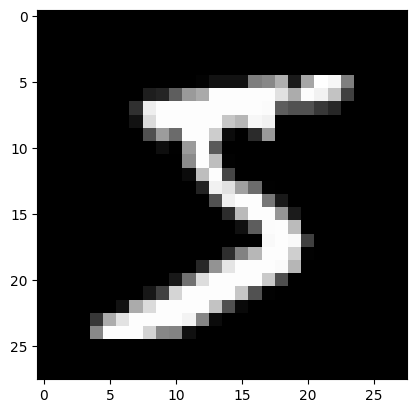

In [5]:
plt.imshow(np.reshape(X[0],[28,28]),cmap='gray')

In [6]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X,y)

In [7]:
x_train = x_train/255
x_test = x_test/255

y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

In [9]:
from tensorflow import nn

network = keras.models.Sequential(
    layers=[
        layers.Dense(25,activation='relu',input_shape=(784,)),
        layers.Dense(15,activation='relu'),
        layers.Dense(10,activation='linear')
    ]
)

network.compile(optimizer='adam',loss=SparseCategoricalCrossentropy(from_logits=True))

network.fit(x_train,y_train,epochs=100)

Epoch 1/100
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.7450
Epoch 2/100
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2284
Epoch 3/100
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1749
Epoch 4/100
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.1457
Epoch 5/100
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1272
Epoch 6/100
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1182
Epoch 7/100
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1100
Epoch 8/100
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0894
Epoch 9/100
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0906
Epoch 10/100
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0816
Epoch 11/100
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0780
Epoch 12/100
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0721
Epoch 13/100
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0722
Epoch 14/100
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0641
Epoch 15/100
16

In [11]:
logits = network(x_test)

f_x = nn.softmax(logits)

In [18]:
np_array = np.array(f_x)

np_array[0]

array([1.3547285e-21, 9.9999994e-01, 1.8583238e-22, 2.4545047e-10,
       2.5353913e-10, 4.3248037e-15, 5.8144863e-16, 8.8129333e-14,
       7.0304730e-12, 6.8423479e-13], dtype=float32)

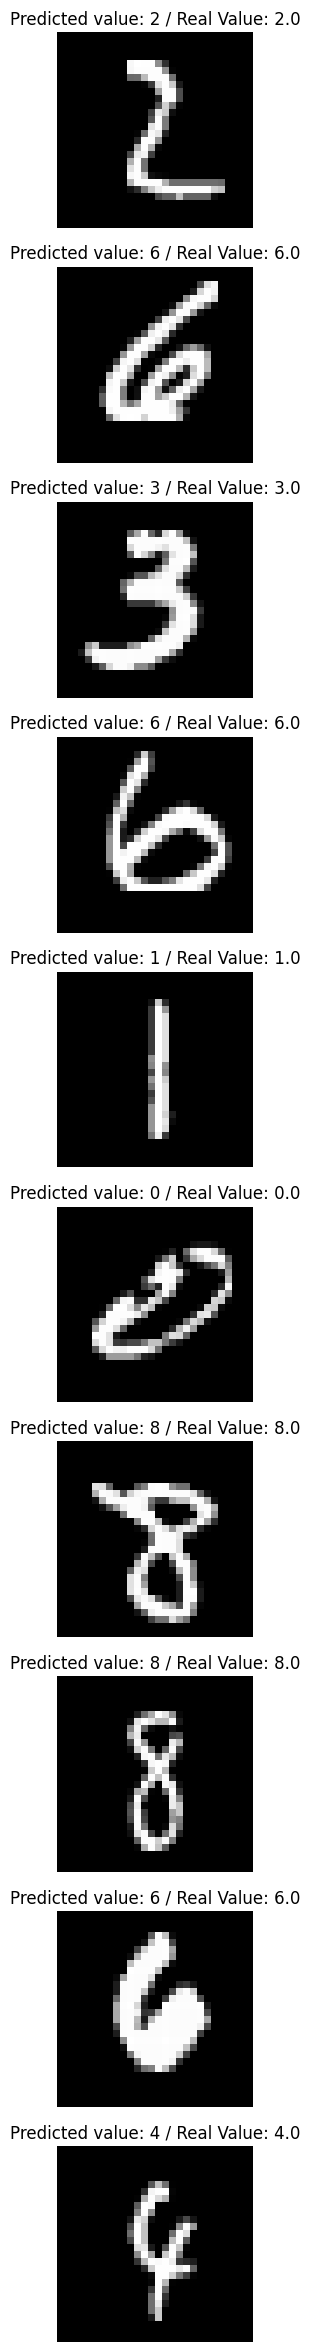

In [30]:
fig, ax = plt.subplots(figsize=(30,30),nrows=10)

for i in range(30,40):
  #print(f"Predicted value: {np.argmax(np_array[i])}")
  #print(f"Actual value: {y_test[i]}")
  ax[i-30].imshow(np.reshape(x_test[i],[28,28]),cmap='gray')
  ax[i-30].set_title(f"Predicted value: {np.argmax(np_array[i])} / Real Value: {y_test[i]}")
  ax[i-30].axis('off')